In [1]:
import os 
import numpy as np 

os.chdir("..")
os.chdir("..")
from driver_folder.time_driver import TimerError 

In [2]:
T =TimerError()
T.start()
end_time = T.elapsed()
print(f"time taken:{end_time}")

time taken:1.2648000392800895e-05


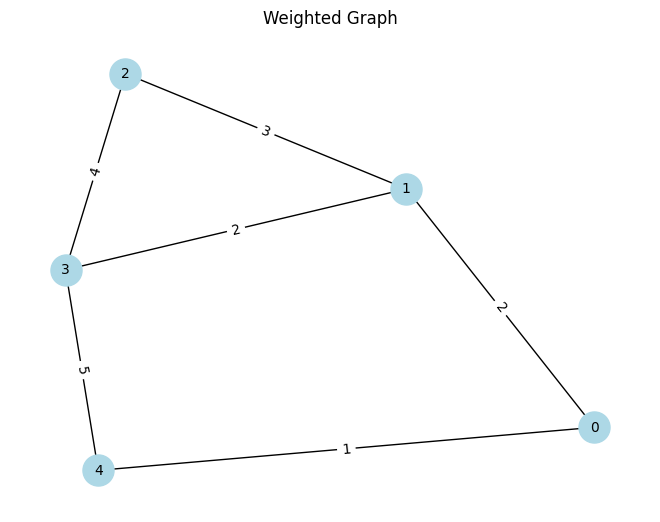

In [15]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Define the number of nodes
num_nodes = 5

# Create a three-dimensional adjacency matrix
# The third dimension size 2: first for presence, second for weight
adj_matrix = np.zeros((num_nodes, num_nodes, 2))

# Define the edges and their weights
edges = [
    (0, 1, 2),
    (0, 4, 1),
    (1, 2, 3),
    (2, 3, 4),
    (3, 4, 5),
    (1, 3, 2)
]

# Fill the adjacency matrix with edge presence and weights
for edge in edges:
    u, v, weight = edge
    adj_matrix[u, v] = [1, weight]
    adj_matrix[v, u] = [1, weight]  # Assuming the graph is undirected

# Create a NetworkX graph
G = nx.Graph()

# Add edges with weights to the graph
for i in range(num_nodes):
    for j in range(num_nodes):
        if adj_matrix[i, j, 0] == 1:
            G.add_edge(i, j, weight=adj_matrix[i, j, 1])

# Draw the graph
pos = nx.spring_layout(G)  # Positions for all nodes
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10)

# Draw edge labels
edge_labels = {(u, v): f'{d["weight"]:.0f}' for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

plt.title("Weighted Graph")
plt.show()


In [17]:
adj_matrix

array([[[0., 0.],
        [1., 2.],
        [0., 0.],
        [0., 0.],
        [1., 1.]],

       [[1., 2.],
        [0., 0.],
        [1., 3.],
        [1., 2.],
        [0., 0.]],

       [[0., 0.],
        [1., 3.],
        [0., 0.],
        [1., 4.],
        [0., 0.]],

       [[0., 0.],
        [1., 2.],
        [1., 4.],
        [0., 0.],
        [1., 5.]],

       [[1., 1.],
        [0., 0.],
        [0., 0.],
        [1., 5.],
        [0., 0.]]])

In [22]:
def dijkastra(WMat , s ):
    rows , cols , x = WMat.shape 
    infinity = np.max(WMat)*rows+1 # set the max value as infinity 
    visited , distance = {} , {} # dict to keep track of the distance and visited 
    for vertex in range(rows): 
        visited[vertex] , distance[vertex] = False , infinity
    # starting vertex
    distance[s] = 0 
    for u in range(rows):
        nextd = min([distance[v] for v in range(rows)
                    if not visited[v]])
        nextvlist = [v for v in range(rows) if (not visited[v]) and distance[v] == nextd]
        # print(nextvlist)
        if nextvlist == []:
            break
        nextv = min(nextvlist)
        visited[nextv] = True 
        for v in range(cols):
            if WMat[nextv, v ,0 ] ==1 and not visited[v]:
                distance[v] = min(distance[v], distance[nextv]+ WMat[nextv, v,1])
    return distance

In [29]:
distance = dijkastra(WMat=adj_matrix, s=0)

In [24]:
plt.show()

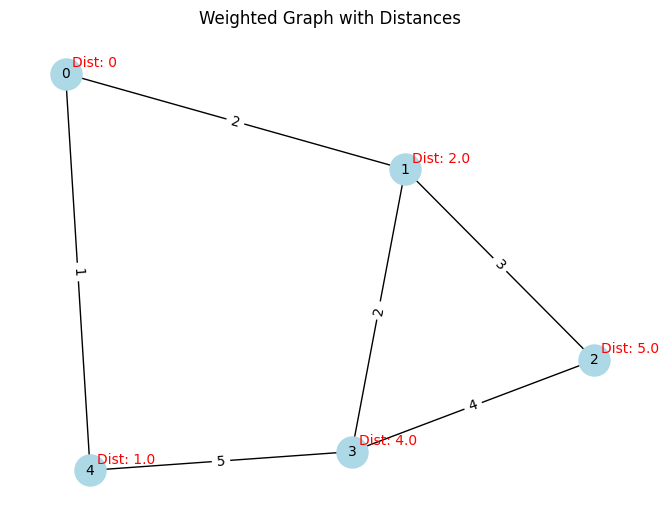

In [30]:
G = nx.Graph()

# Add edges with weights to the graph
for i in range(num_nodes):
    for j in range(num_nodes):
        if adj_matrix[i, j, 0] == 1:
            G.add_edge(i, j, weight=adj_matrix[i, j, 1])



# Draw the graph
pos = nx.spring_layout(G)  # Positions for all nodes
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10)

# Draw edge labels
edge_labels = {(u, v): f'{d["weight"]:.0f}' for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

# Add the distance information to the plot
for node, dist in distance.items():
    plt.annotate(f'Dist: {dist}', xy=pos[node], xytext=(5, 5), textcoords='offset points', fontsize=10, color='red')

plt.title("Weighted Graph with Distances")
plt.show()